<a href="https://colab.research.google.com/github/JMML2021/Tasca-M6-T01-ML_regressions-/blob/main/Sprint_6_Algoritmes_d%E2%80%99aprenentatge_supervisat_Regressi%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [178]:
# Configuració warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [179]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
# Abro el fichero

#path='https://drive.google.com/file/d/1j8WdhTxMpngrUigfcfrJynng-9JHo9xa/view?usp=sharing'
path = ('/content/drive/MyDrive/01_COLAB/housing data.csv')
#data = pd.read_csv(file,
    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
print('\nImprimo el primer registro, solo para ver como es:\n')
df1.iloc[0]
#df1.dtypes

Hay  505 filas con 14 columnas

Imprimo el primer registro, solo para ver como es:



0.00632      0.02731
18.00        0.00000
2.310        7.07000
0            0.00000
0.5380       0.46900
6.5750       6.42100
65.20       78.90000
4.0900       4.96710
1            2.00000
296.0      242.00000
15.30       17.80000
396.90     396.90000
4.98         9.14000
24.00       21.60000
Name: 0, dtype: float64

Veo que faltan el nombre de las columnas, luego las añado

In [181]:
# Asigno una lista con los nombres de las columnas
Nombre_Columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df1.columns = Nombre_Columnas
df1.iloc[0]



CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
MEDV        21.60000
Name: 0, dtype: float64

Para obtener más información sobre el conjunto de datos de Boston.** Descripción de todas las variables se proporciona a continuación:**

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [182]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [183]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [184]:
# Identifico datos de Test y de Train:

from sklearn.model_selection import train_test_split   
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' ]
 
x = df1.loc[:, features]
y = df1.loc[:, ['MEDV']]
    
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 13)
xtest shape  :  (101, 13)
ytrain shape :  (404, 1)
ytest shape  :  (101, 1)


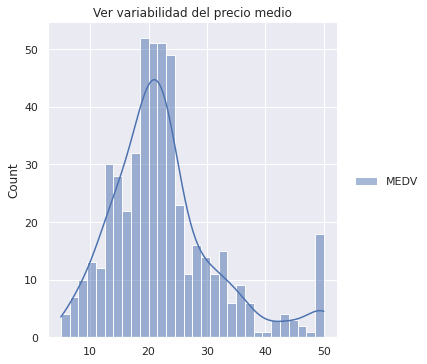

In [185]:
# Analizamos la variable de Salida (MEDV = y) para ver que forma tiene:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(y, bins=30, kde = True)
plt.title('Ver variabilidad del precio medio')
plt.show()

**VERDE **
l


ttps://www.kaggle.com/code/deuterium06/boston-housing-linear-regression/notebook



Estudiamos la correlacion entre las variables con respecto a MEDV

---



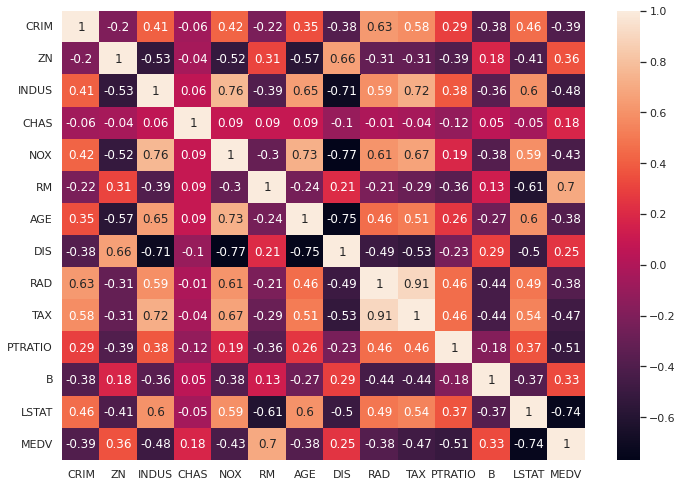

In [186]:
correlation_matrix = df1.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Trabajando con todos las variables para ver la correlación... 


Para simplificar, solo cogeremos a las 3 variables con un valor mayor. Para ello 


ordenaremos la tabla


---




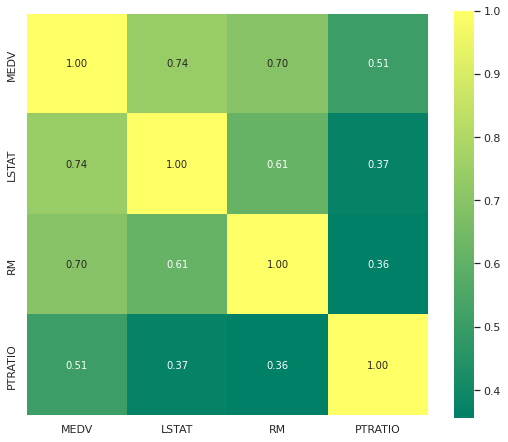

In [187]:
# Correlacion de 3 principales alementos respecto a MEDV

columns_sorted = df1.corr().abs().nlargest(4, 'MEDV').index
correlation_sorted = np.corrcoef(df1[columns_sorted].values.T)

f, ax = plt.subplots(figsize = (9,7.5))
hm = sns.heatmap(abs(correlation_sorted), annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns_sorted.values, xticklabels=columns_sorted.values, cmap='summer')
plt.show()

Vemos que LSTAT y RM son los mas importantes




---



Creare:

1.- Random Forest

2.- Los modelos Multiple linear model. 

2.1- Luego hare polinomica sus entradas ( LSTAT y RM)

3.- General Linear Model

4.- Red neuronal.


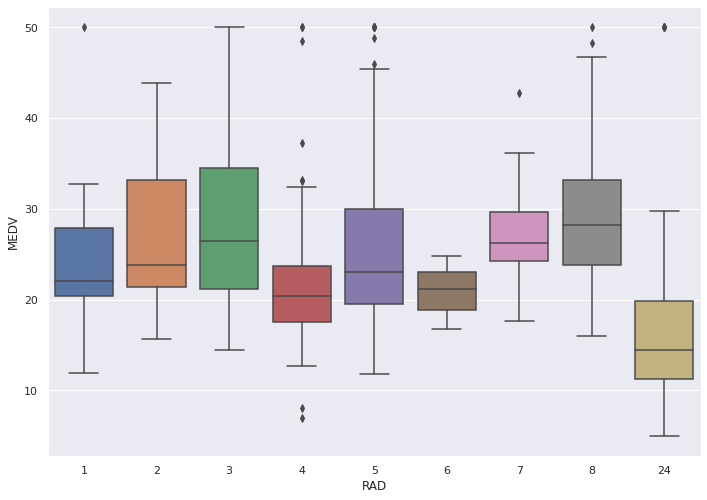

In [188]:
# Alaisis particular de una variable a modo de ejemplo
df2= pd.DataFrame(df1)
sns.boxplot(df2['RAD'], df2['MEDV'])

**Conclusion:**

Con las otras variables y tomando la variable RAD, es una variable que solo afecta practicamente y estadisticamente significativamente cuando RAD = 24

## Subrurina para el Analisis gráfico de los residuos.

In [189]:
# Subrutina Gráficos de los residuos
# ==============================================================================

import statsmodels.api as sm

def analisisGraficoResiduos(Y_train, prediccion_train):
  residuos_train   = prediccion_train - Y_train
  
  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

  axes[0, 0].scatter(Y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
  axes[0, 0].plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()],
                  'k--', color = 'black', lw=2)
  axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
  axes[0, 0].set_xlabel('Real')
  axes[0, 0].set_ylabel('Predicción')
  axes[0, 0].tick_params(labelsize = 7)

  axes[0, 1].scatter(list(range(len(Y_train))), residuos_train,
                    edgecolors=(0, 0, 0), alpha = 0.4)
  axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
  axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
  axes[0, 1].set_xlabel('id')
  axes[0, 1].set_ylabel('Residuo')
  axes[0, 1].tick_params(labelsize = 7)

  sns.histplot(
      data    = residuos_train,
      stat    = "density",
      kde     = True,
      line_kws= {'linewidth': 1},
      color   = "firebrick",
      alpha   = 0.3,
      ax      = axes[1, 0]
  )

  axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                      fontweight = "bold")
  axes[1, 0].set_xlabel("Residuo")
  axes[1, 0].tick_params(labelsize = 7)


  sm.qqplot(
      residuos_train,
      fit   = True,
      line  = 'q',
      ax    = axes[1, 1], 
      color = 'firebrick',
      alpha = 0.4,
      lw    = 2
  )
  axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
  axes[1, 1].tick_params(labelsize = 7)

  axes[2, 0].scatter(prediccion_train, residuos_train,
                    edgecolors=(0, 0, 0), alpha = 0.4)
  axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
  axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
  axes[2, 0].set_xlabel('Predicción')
  axes[2, 0].set_ylabel('Residuo')
  axes[2, 0].tick_params(labelsize = 7)

  # Se eliminan los axes vacíos
  fig.delaxes(axes[2,1])

  fig.tight_layout()
  plt.subplots_adjust(top=0.9)
  fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

## Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [190]:
#para el ejercico 2 guardaremos los valores de MSE y R2 de cada test
comparativa=[]

# 1.1 Random Forest 

In [191]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = pd.DataFrame(np.c_[df1['LSTAT'], df1['RM']], columns = ['LSTAT','RM'])
Y = df1['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

feats = ['LSTAT', 'RM']
m = RandomForestRegressor(n_jobs = -1, oob_score = True)
m.fit(X_train, Y_train)
print('m: ', m)
feat_imps = m.feature_importances_

print(' feat_imps', feat_imps)

score = round(m.score(X_train, Y_train),2)
print('Score R-squared: ', score)

ypredict = (m.predict(X_test))
Y_test=Y_test.to_numpy()


# Podemos verificar la precisión de los datos pronosticados mediante el uso de métricas MSE y RMSE.

mae = round(np.mean(np.absolute(Y_test - ypredict)),2)
print('MAE medio', mae)
mae= np.absolute (Y_test - ypredict)
 
mae_percent = round(np.mean(mae/Y_test),2)
print('Porcentaje de MAE: ', mae_percent)
r2 = round(r2_score(Y_test, ypredict),2)
print('R2: ',r2)

# Comprobación de predicción y precisión
mse_2 = round(mean_squared_error(Y_test, ypredict),2)
print('mean_squared_error; ', mse_2)

comparativa.append(['Random Forest', mse_2, r2])

m:  RandomForestRegressor(n_jobs=-1, oob_score=True)
 feat_imps [0.55028059 0.44971941]
Score R-squared:  0.96
MAE medio 3.02
Porcentaje de MAE:  0.18
R2:  0.72
mean_squared_error;  15.75


https://www.cienciadedatos.net/documentos/py08_random_forest_python.html

## Analisis de los residuos de Randon Forest

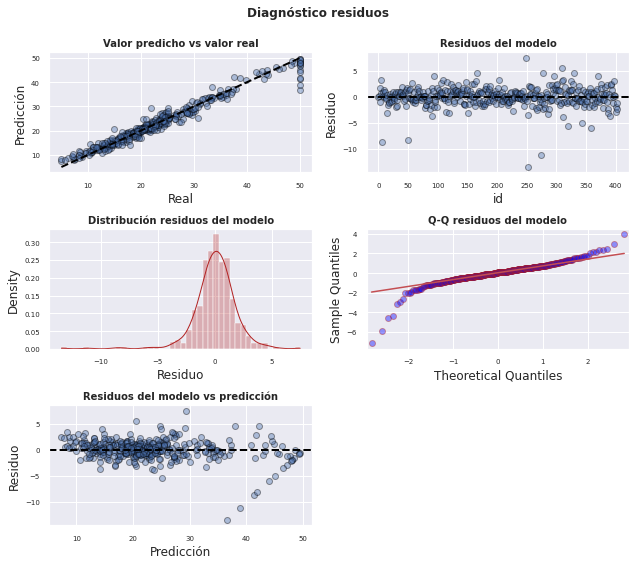

In [192]:
Xpredict = (m.predict(X_train))
analisisGraficoResiduos(Y_train, Xpredict)



---



Explicacion del gráfico de los residuos del Randon Forest:

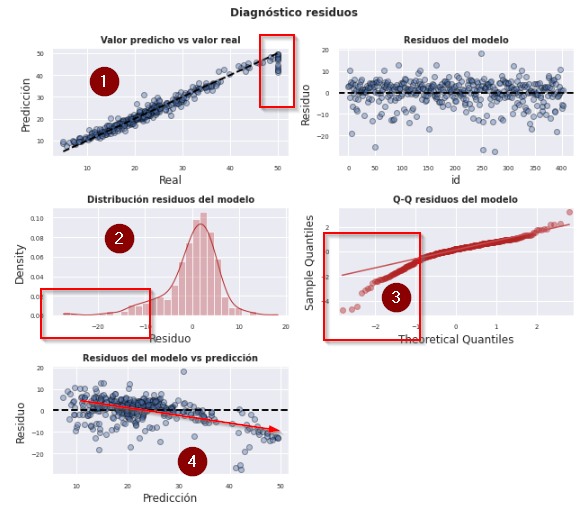

*Conclusiones * los residuos de Random Forest:

1.- en los valores altos vemos que hay valores que no siguen la recta, por lo que podemos decir que su comportamiento es anormal

2.- En los valores inferiores, la cola es muy larga

3.- Al igual que en el grafico 2, vemos que en valores bajos el comportamiento no es bueno.

4.- El valor del residuo no es lineal

Por todo ello el valor del residuo no es normal en los extremos, y no explica perfectamente el modelo y hay que tenerlo en cuenta....

In [193]:
# Estudio Normalidad de los residuos Shapiro-Wilk test
# 
# ==============================================================================

from scipy import stats

shapiro_test = stats.shapiro(Y_test - ypredict)
shapiro_test

ShapiroResult(statistic=0.9888675212860107, pvalue=0.5669854879379272)

**Observaciones:**
Para ajustar un modelo de regresión lineal, seleccionamos aquellas características que tienen una alta correlación con nuestra variable objetivo MEDV. Al observar la matriz de correlación, podemos ver que RM tiene una fuerte correlación positiva con MEDV (0,7), mientras que LSTAT tiene una alta correlación negativa con MEDV (-0,74).

Un punto importante en la selección de características para un modelo de regresión lineal es comprobar la multicolinealidad. Las características RAD, TAX tienen una correlación de 0,91. Estos pares de características están fuertemente correlacionados entre sí. No debemos seleccionar ambas características juntas para entrenar el modelo. Lo mismo ocurre con las funciones DIS y AGE, que tienen una correlación de -0,75.

En base a las observaciones anteriores, utilizaremos RM y LSTAT como nuestras características. Usando un gráfico de dispersión, veamos cómo varían estas características con MEDV.

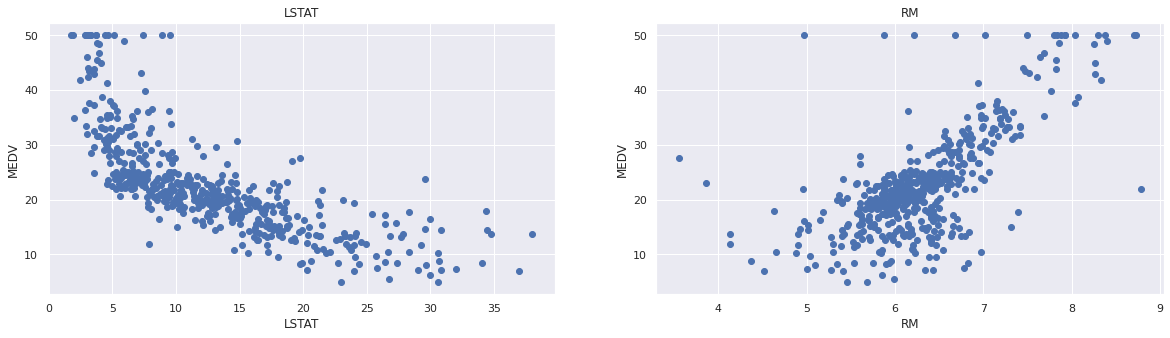

In [194]:
#Dibujo correlacion entre LSTAT y RM

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df1['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df1[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Observaciones:**
Los precios aumentan a medida que el valor de RM aumenta linealmente. Hay pocos valores atípicos y los datos parecen tener un límite de 50.

Los precios tienden a disminuir con un aumento en LSTAT. Aunque no parece estar siguiendo exactamente una línea lineal.

In [195]:
X = pd.DataFrame(np.c_[df1['LSTAT'], df1['RM']], columns = ['LSTAT','RM'])
Y = df1['MEDV']

In [196]:
#from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(101, 2)
(404,)
(101,)


# 1.2 Regresion Lineal

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [198]:
# model evaluation for training set

from sklearn.metrics import r2_score

y_train_predict = lin_model.predict(X_train)
rmse = round((np.sqrt(mean_squared_error(Y_train, y_train_predict))),2)
r2 = round(r2_score(Y_train, y_train_predict),2)

print("El modelo para el dataset de training da: ")
print("--------------------------------------")
print('error cuadrático medio (RMSE) es {}'.format(rmse))
print('R2 score es {}'.format(r2))
print("\n")

# Evaluacion del modelo de set
y_test_predict = lin_model.predict(X_test)
rmse = round((np.sqrt(mean_squared_error(Y_test, y_test_predict))),2)
r2 = round(r2_score(Y_test, y_test_predict),2)

print("el modelo para el dataset de Test da")
print("--------------------------------------")
print('error cuadrático medio (RMSE) es {}'.format(rmse))
print('R2 El valor es {}'.format(r2))

comparativa.append(['Regresion Lineal', rmse, r2]) # GUardo valores apra el ejercicio 2

El modelo para el dataset de training da: 
--------------------------------------
error cuadrático medio (RMSE) es 5.74
R2 score es 0.64


el modelo para el dataset de Test da
--------------------------------------
error cuadrático medio (RMSE) es 4.62
R2 El valor es 0.62


In [199]:
import pandas.util.testing as tm


In [200]:
#!pip install statsmodels

In [201]:
window = 1000
a = np.array([np.nan] * len(df))
b = [np.nan] * len(df)  # If betas required.
#y_ = df.y.values
y_ = df1["MEDV"]
#x_ = df[['x']].assign(constant=1).values
x_ = df1["RM"]
for n in range(window, len(df)):
    y = y_[(n - window):n]
    X = x_[(n - window):n]
    # betas = Inverse(X'.X).X'.y
    betas = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    y_hat = betas.dot(x_[n, :])
    a[n] = y_hat
    b[n] = betas.tolist()  # If betas required.

https://nsamrao.github.io/Boston_Housing/

In [202]:
#import statsmodels.api as sm
from statsmodels.formula.api import ols

In [203]:
bos1 = df1
bos1['CRIM'] = np.log(bos1['CRIM'])

In [204]:
Nombre_Columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [205]:
  import pandas.util.testing as tm
  data = pd.DataFrame({"y": df1["MEDV"], "x": df1["RM"]}, index=[5, 3, 1])
  results = ols('y ~ x', data).fit()

FOREST

## Importancia de predictores

Vamos a ver como afectan los predictores (variables de entrada) individualmente respecto a la respuesta en MEDV

In [206]:
from sklearn.inspection import permutation_importance
import multiprocessing

modelo_final = m
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = Y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
0,7.310087,0.201402,LSTAT
1,5.382554,0.252390,RM


Aparentemente vemos que las desv_Std son practicamente iguales respecto a las medias.

POr ello vamos a dibujar las medias

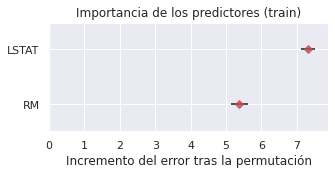

In [207]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 2))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

**Fitting Linear Regression using statsmodels**


https://github.com/shashankvmaiya/Boston-Housing-Price-Prediction/blob/master/Mini_Project_Linear_Regression.ipynb


**RESIDUOS:**


https://colab.research.google.com/github/RPI-DATA/course-intro-ml-app/blob/master/content/notebooks/12-intro-modeling-2/02-regression-boston-housing-python.ipynb

# 1.3 Multiple Linear Regression (MLR)

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [208]:
# Por prudencia vuelvo a separar los datos en Test y Train

X = pd.DataFrame(np.c_[df1['LSTAT'], df1['RM']], columns = ['LSTAT','RM'])
Y = df1['MEDV']

#from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 2)
(101, 2)
(404,)
(101,)


In [253]:
## Modelo MLR sin la constante:

import statsmodels.api as sm
modelo = sm.OLS(Y_train, X_train).fit()

predictions = modelo.predict(X_test) # make the predictions by the model

# Imprimimos los estadsiticos
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              3541.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):                   5.64e-256
Time:                        09:04:57   Log-Likelihood:                         -1279.4
No. Observations:                 404   AIC:                                      2563.
Df Residuals:                     402   BIC:                                      2571.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [255]:


comparativa.append(['MLR', mse_2, round(modelo.rsquared,2)]) # Guardo valores apra el ejercicio 2



,0,1,2
0,Random Forest,15.75,0.720
1,Regresion Lineal,4.62,0.620
2,MLR,15.75,0.946
3,MLR,15.75,0.946
4,GLM,29.21,0.650
5,Red Neuronal,11.35,0.770
0,MLR,NaN,NaN
1,11.35,NaN,NaN
2,0.95,NaN,NaN




---


 **Interpretación de la salida:** 

Podemos ver aquí que este modelo tiene un valor de $R^{2}$ alto: 0,948, lo que significa que este modelo explica el 94,8 % de la varianza de nuestra variable dependiente. 

Podemos ver que tanto RM como LSTAT son estadísticamente significativos para predecir (o estimar) el valor medio de la casa; Vemos que a medida que RM aumenta en 1, MEDV aumentará en 4,9069 y cuando LSTAT aumente en 1, MEDV disminuirá en -0,6557. 

LSTAT es el porcentaje de estatus más bajo de la población y, lamentablemente, podemos esperar que reduzca el valor medio de las casas. Con esta misma lógica, cuantas más habitaciones tenga una casa, normalmente mayor será su valor.



---



In [215]:
mse_2 = round(mean_squared_error(Y_test, predictions),2)
print('mean_squared_error MLR: ', mse_2)

mean_squared_error MLR:  21.22


## Estudio Residuos de MLR

**Normality of the residuals**


https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html?highlight=residual

In [216]:
import statsmodels.stats.api as sms 
from statsmodels.compat import lzip 

name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(modelo.resid)
print('estudio de los residuos por su estadisticos:')
lzip(name, test)
#print(\ntest)

estudio de los residuos por su estadisticos:


[('Jarque-Bera', 311.33555096077407),
 ('Chi^2 two-tail prob.', 2.479385738002033e-68),
 ('Skew', 1.2851183542114206),
 ('Kurtosis', 6.448052277427101)]

Explicacion de la prueba de normalidad Jarque Bera

https://www.youtube.com/watch?v=qn670WeacAQ






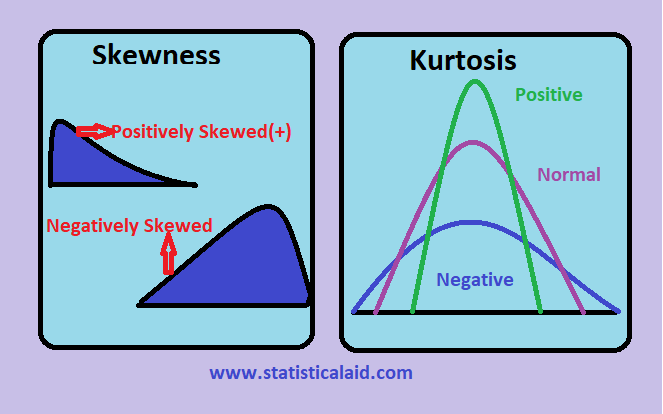

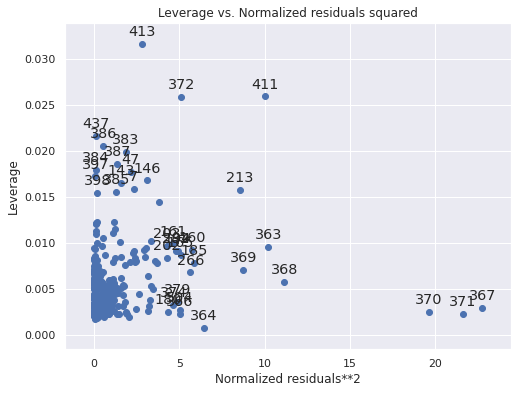

In [217]:
# Para ver la dispersión de los residuos y ver si hay outliers.

from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(modelo, ax=ax)
 

## Error de test MLR

In [218]:
# Error de test del modelo 
# ==============================================================================
from sklearn.metrics import mean_squared_error

X_test1 = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(X_test)
rmse = mean_squared_error(
        y_true  = Y_test,
        y_pred  = predicciones,
        squared = False
       )
rmse=round(rmse,2)
print("")
print(f"El error (rmse) de test es: {rmse}")
print()




El error (rmse) de test es: 4.61



## Diagnóstico de los resíduos


https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

In [219]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
Y_train = Y_train.values.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - Y_train

El error de test del modelo es de 4.606. Las predicciones del modelo final se alejan en promedio 4.606 unidades del valor real.

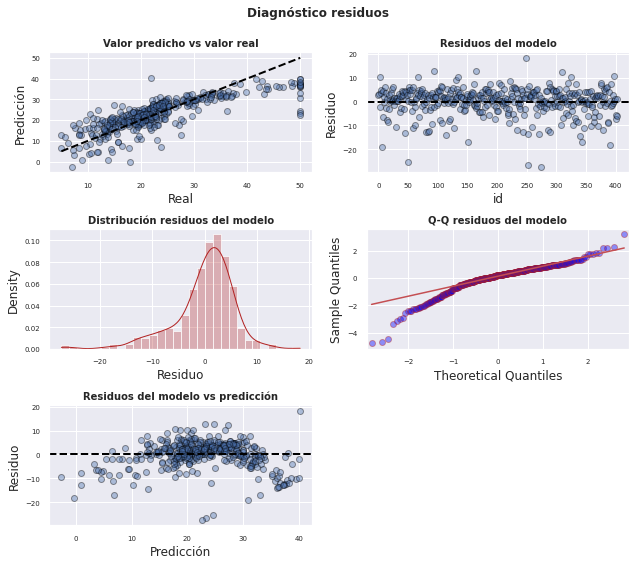

In [220]:
# LLamo a la subrutina de grafico de los residuos

analisisGraficoResiduos(Y_train, prediccion_train)

Explicacion de lo que se ve en los gráficos

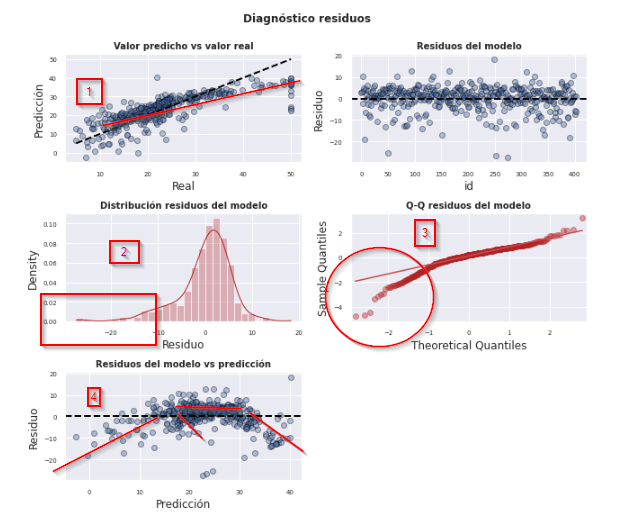

**Comentarios:**
1.- La aproximacion de la recta de residuos vemos que tiene una deriva de 15º

2.- En la parte inferior, para valores pequeños, es donde tenemos mas error.

3.- Vemos el mismo comportamiento del residuo que en el gráfico 2

4.- En el gráfico Residuo del modelo vs predicción veo un comportamiento cuadradico o de rango superior

In [221]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================

from scipy import stats

shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9111231565475464, pvalue=1.1496883225168078e-14)

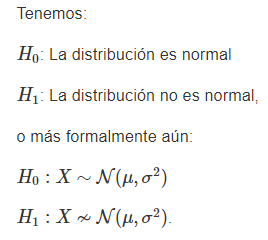

Comclusion: No es normal

# 1.4 General Linear Model GLM

In [222]:
## Modelo GLM:

modelo_GLM = sm.GLM(Y_train, X_train, family=sm.families.Gamma()).fit()
predictions = modelo_GLM.predict(X_test) # make the predictions by the model
print(modelo_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  404
Model:                            GLM   Df Residuals:                      402
Model Family:                   Gamma   Df Model:                            1
Link Function:          inverse_power   Scale:                        0.067036
Method:                          IRLS   Log-Likelihood:                -1241.7
Date:                Mon, 29 Aug 2022   Deviance:                       24.659
Time:                        09:01:25   Pearson chi2:                     26.9
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT          0.0027   8.96e-05     30.477      0.0

In [223]:
# Cálculo del MSE (Mean Squared Error):

mse_2 = round(mean_squared_error(Y_test, predictions),2)
print('mean_squared_error del GLM; ', mse_2)


mean_squared_error del GLM;  29.21


In [224]:
# Calculo del R-squared del GLM

#calculate sse
sse = np.sum((modelo_GLM.fittedvalues - Y_train)**2)
print('SSE: ',sse)

#calculate ssr
ssr = np.sum((modelo_GLM.fittedvalues -  Y_train.mean())**2)
print('SSR: ',ssr)


#calculate sst
sst = ssr + sse
print('SST: ', sst)
r2 = round((1.0 - sse/sst),2)

print('R-squared: ', r2)


comparativa.append(['GLM', mse_2, r2]) # GUardo valores apra el ejercicio 2

SSE:  14317.559992248782
SSR:  26187.05858235781
SST:  40504.61857460659
R-squared:  0.65


In [225]:
# Imprimimos los estadisticos
print(modelo_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  404
Model:                            GLM   Df Residuals:                      402
Model Family:                   Gamma   Df Model:                            1
Link Function:          inverse_power   Scale:                        0.067036
Method:                          IRLS   Log-Likelihood:                -1241.7
Date:                Mon, 29 Aug 2022   Deviance:                       24.659
Time:                        09:01:25   Pearson chi2:                     26.9
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT          0.0027   8.96e-05     30.477      0.0

# 1.5 Red neuronal

https://www.cienciadedatos.net/documentos/py35-redes-neuronales-python.html

In [226]:
# Modelado de la RN
# ==============================================================================

from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

## Pipepeline de preprocesado + modelolado

In [227]:
# Pipeline de preprocedado y modelado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [228]:
# Selección de las variables por típo
# ==============================================================================
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [229]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = Y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
41,0.001,10,10.0,-21.754259,13.224617,-20.131732,2.977754
17,0.001,"(10, 10)",0.004642,-21.922732,12.042691,-16.520473,2.522141
21,0.001,20,46.415888,-21.928843,12.884289,-20.850273,3.131331
4,0.01,10,46.415888,-21.932252,12.754468,-21.043413,3.265949
45,0.001,"(10, 10)",46.415888,-22.048693,12.813450,-20.045473,2.877904
48,0.01,"(10, 10)",46.415888,-22.059847,13.274708,-19.552814,2.839029
30,0.01,10,10.0,-22.115228,12.877646,-19.536569,2.619994
18,0.001,10,2.154435,-22.115634,12.277021,-18.351987,2.582111
1,0.01,20,10.0,-22.216428,13.030578,-19.334397,2.894767
0,0.001,10,0.464159,-22.261655,12.715657,-18.600482,2.501205


In [230]:
# La combinación de hiperparámetros con la que se obtienen mejores resultados acorde a las metricas 
# de validación cruzada es:

#modelo_final_RN['modelo'].get_params()


## Analisis de los residuos de la Red Neuronal (RN)

Explicacion de cada subgráfico de residuos

In [231]:
# Error de test
# ==============================================================================
modelo_final_RN = grid.best_estimator_
predicciones = modelo_final_RN.predict(X = X_test)
rmse = mean_squared_error(
        y_true = Y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

Error de test (rmse):  3.3694755472926166


In [232]:
mse_2 = round(mean_squared_error(Y_test, predicciones),2)
print('mean_squared_error MLR: ', mse_2)


mean_squared_error MLR:  11.35


Conclusión de los residuos:

1.- Al igual que los otros modelos vemos que hay outliers en los valores altos

2.- Hay una gran cola en los valores inferiores

3.- En los valores inferiores se pierde la normalidad como lo habíamos visto en el gráfico 3

4.- Y se ve que el error va aumentando con valores más altos.

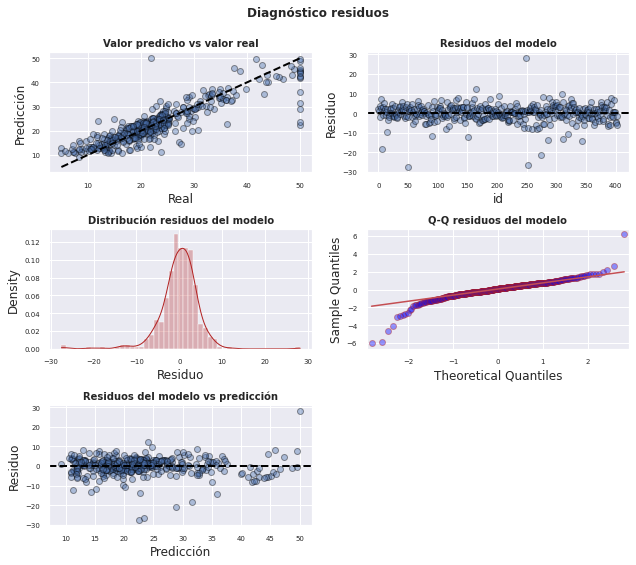

In [233]:
# LLamo a la subrutina de grafico de los residuos
predicciones_RN = modelo_final_RN.predict(X = X_train)
analisisGraficoResiduos(Y_train, predicciones_RN)

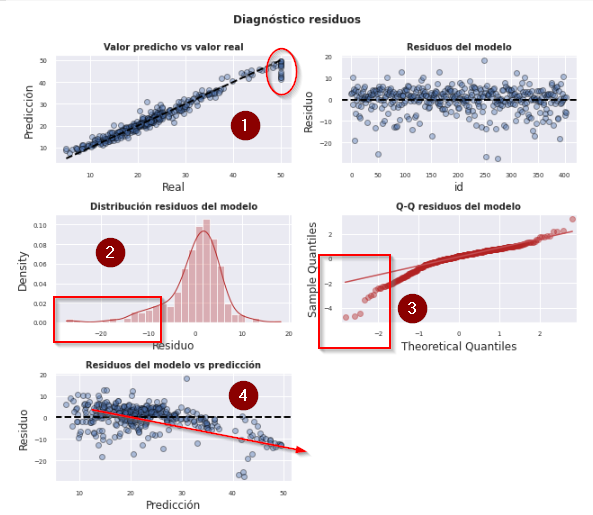

In [234]:
score = round(modelo_final_RN.score(X_train, Y_train),2)
print('Score: ', score)

comparativa.append(['Red Neuronal', mse_2, score]) # GUardo valores apra el ejercicio 2

Score:  0.77


**Conclusion** del modelo obtenido de Red Neuronal:

Ha sido el peor modelo con un $R^{2}$ de 0.78

# Exercici 2
Compara’ls en base al MSE i al R2.

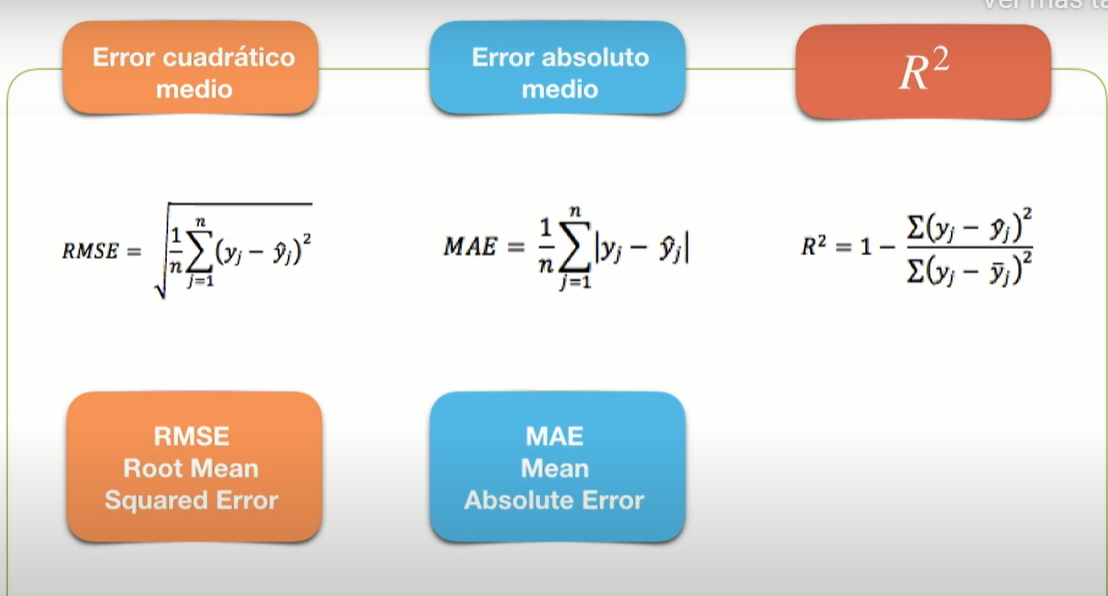C:\Users\JoseMaria\Pictures\greenShoot\2022-07-27 08_25_45-Evaluando el error en los modelos de regresión - 🤖 Aprende IA.jpg

In [256]:
comparativa= pd.DataFrame(comparativa)
comparativa

,0,1,2
0,Random Forest,15.75,0.720
1,Regresion Lineal,4.62,0.620
2,MLR,15.75,0.946
3,MLR,15.75,0.946
4,GLM,29.21,0.650
5,Red Neuronal,11.35,0.770


# Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

In [236]:
from sklearn.preprocessing import PolynomialFeatures


In [237]:
X = pd.DataFrame(np.c_[df1['LSTAT'], df1['RM']], columns = ['LSTAT','RM'])

trans = PolynomialFeatures(degree=2)
X_Polinomica = trans.fit_transform(X)

X_Polinomica = trans.transform(X)
X_Polinomica = pd.DataFrame(X_Polinomica)
 

Y = df1['MEDV']

#from sklearn.model_selection import train_test_split

X_train_Polinomica, X_test_Polinomica, Y_train_Polinomica, Y_test_Polinomica = train_test_split(X_Polinomica, Y, test_size = 0.2, random_state=5)
print(X_train_Polinomica.shape)
print(X_test_Polinomica.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 6)
(101, 6)
(404,)
(101,)


In [238]:
X_train_Polinomica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 248 to 355
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
dtypes: float64(6)
memory usage: 22.1 KB


In [239]:
## Sin constante

modelo_2 = sm.OLS(Y_train_Polinomica, X_train_Polinomica).fit()

predictions = modelo_2.predict(X_test_Polinomica) # make the predictions by the model

# Imprimimos el resumen del modelo
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 29 Aug 2022   Prob (F-statistic):          4.61e-117
Time:                        09:02:36   Log-Likelihood:                -1205.3
No. Observations:                 404   AIC:                             2423.
Df Residuals:                     398   BIC:                             2447.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             67.0117     17.451      3.840      0.0

In [240]:
print('Parametros de:')
print(modelo_2.params)


print('\nR square adjusted es ', round(modelo_2.rsquared_adj,3))

Parametros de:
0    67.011653
1     0.145421
2   -16.420161
3     0.011828
4    -0.213010
5     1.771534
dtype: float64

R square adjusted es  0.746


Diferencia entre $R^{2}$ (0.638) v $R^{2} adjusted$ (0.636) es una diferencia muy pequeña por lo que el modelo está bien explicado, y no hay overfeeting


In [241]:
#display adjusted R-squared
#print(modelo_final_RN.rsquared_adj)

Estudio del residuo de MLR polinómica:


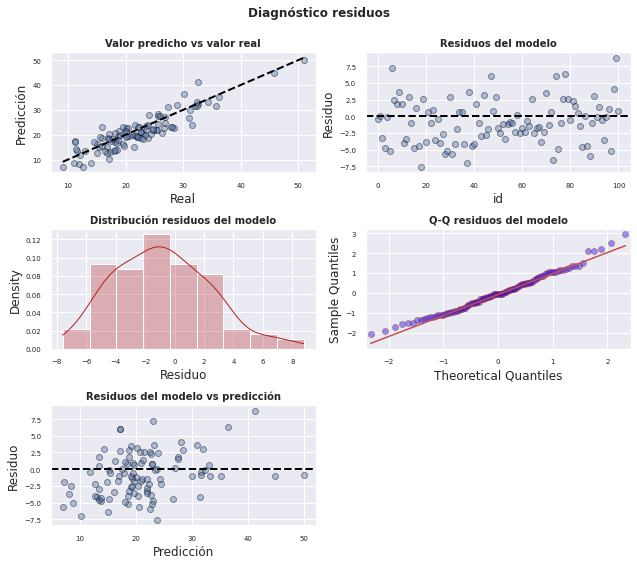

In [242]:
# Llamo a la subrutina de grafico de los residuos

print('Estudio del residuo de MLR polinómica:')
analisisGraficoResiduos(predictions, Y_test)

### Explicación de los residuos MLR polinómico

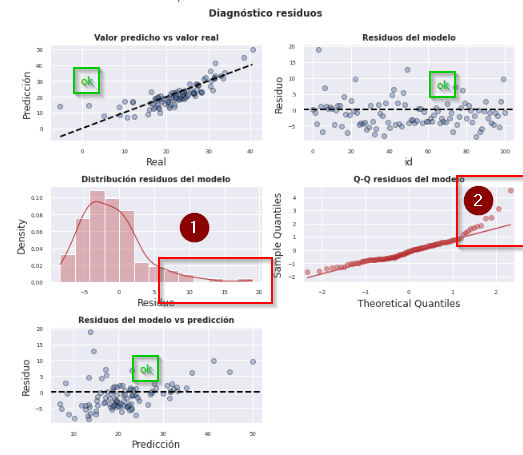

Con el modelo polinómico vemos que hemos mejorado los residuos, porque el elemento cuadrático ha dasaparecido ,  pero vemos que en los valores altos (gráficos 1 y 2) deja de tener un comportamiento normal.

Lo que nos ha cambiado y a mal es el valor de $R^{2}$ que ha pasado de un 0.97 a un $R^{2}$ 0.638 ... y la verdad no entiendo este mal comportamiento porque al subir de grado el modelo debería de haber mejorado.

In [243]:
# BORRARRRRRR

modelo = sm.OLS(Y_train, X_train).fit()

predictions = modelo.predict(X_test) # make the predictions by the model

# Print out the statistics
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              3541.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):                   5.64e-256
Time:                        09:02:39   Log-Likelihood:                         -1279.4
No. Observations:                 404   AIC:                                      2563.
Df Residuals:                     402   BIC:                                      2571.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [244]:
print(modelo.params)
print(modelo.rsquared_adj)

LSTAT   -0.680739
RM       4.992741
dtype: float64
0.9460164899129764


# Exercici 4

Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

## Comparación de modelos mediante test F-test (ANOVA)

In [245]:
from statsmodels.stats.anova import anova_lm

modelo = sm.OLS(Y_train, X_train).fit()
modelo_2 = sm.OLS(Y_train_Polinomica, X_train_Polinomica).fit()

anova_lm(modelo, modelo_2)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,402.0,13322.322359,0.0,NaN,NaN,NaN
1,398.0,9231.065106,4.0,4091.257253,44.09893,1.221468e-30


**Conclusion:**

**El test ANOVA NO encuentra** evidencias claras (p-value = 0.8) de que el modelo que incluye la interacción entre predictores es capaz de modelar mejor la variable respuesta.

In [246]:
# Compara los valores de train v valores de test

modelo_1 = sm.OLS(Y_train, X_train).fit()
modelo_3 = sm.OLS(Y_test, X_test).fit()

anova_lm(modelo_1, modelo_2, modelo_3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,402.0,13322.322359,0.0,NaN,NaN,NaN
1,398.0,9231.065106,4.0,4091.257253,53.508713,4.539773e-36
2,99.0,1892.376227,299.0,7338.688880,1.284029,7.183046e-02


## Validacion cruzada

https://refactored.ai/microcourse/notebook?path=content%2F05-Regression_models_in_Machine_Learning%2F01-Supervised_Models_and_Linear_Regression%2F03-Advanced_Linear_Regression.ipynb

In [247]:
df1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [248]:
#Crosss Validation (CV) using Scikit-Learn

# https://refactored.ai/microcourse/notebook?path=content%2F05-Regression_models_in_Machine_Learning%2F01-Supervised_Models_and_Linear_Regression%2F03-Advanced_Linear_Regression.ipynb


# Perform linear regression using sklearn

import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LinearRegression
#import sklearn
from sklearn import linear_model

reg_model = linear_model.LinearRegression()
X = df1[['RM',  'LSTAT']]
y = df1['MEDV']
reg_model.fit(X, y)

n_fold_var = 5
k_folds = KFold(n_splits=n_fold_var)
scores = []

for train_index, test_index in k_folds.split(X):
    lm = linear_model.LinearRegression().fit(df1.iloc[train_index], y.iloc[train_index])
    y_hat = lm.predict(df1.iloc[test_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], y_hat))
    print(metrics.mean_squared_error(y.iloc[test_index], y_hat))

mean_scores = np.mean(scores)
 
print('Media de los scores para cada fold: ', mean_scores)


1.1750122235787031e-28
5.021216819291921e-28
4.1989269568991676e-29
2.332646075730508e-27
1.058049925997667e-27
Media de los scores para cada fold:  8.104616351168458e-28


# Información de sesión

In [249]:
!pip install session_info
import session_info


session_info.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=8bac8b56ff08685118bf78dedbcab55fb785edaa48fe0b212b49e86fddbf8f45
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info
